In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_csv('cars_dataset.csv')
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [28]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [29]:
dfi = df.dropna(axis=0)
#or i can use this on some columns
#from sklearn.impute import SimpleImputer

In [30]:
dfi.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [31]:
dfi = dfi.drop_duplicates(keep='first')

<AxesSubplot:xlabel='mileage', ylabel='price'>

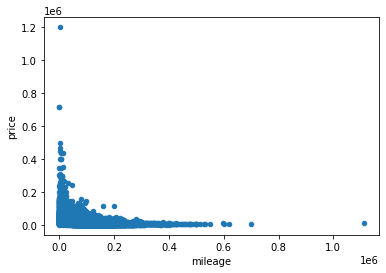

In [32]:
import matplotlib.pyplot as plt
dfi.plot('mileage' , 'price' ,kind='scatter')

<AxesSubplot:xlabel='hp', ylabel='price'>

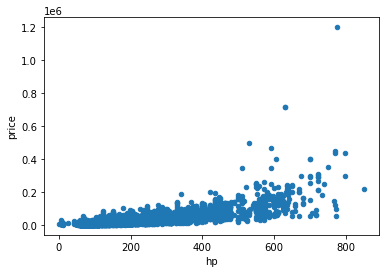

In [33]:
dfi.plot('hp' , 'price' ,kind='scatter')

In [34]:
#replace years of the car with age of the car

from datetime import datetime

dfi['age'] = datetime.now().year - dfi['year']
dfi.drop('year', axis=1, inplace=True)
dfi.head()

,mileage,make,model,fuel,gear,offerType,price,hp,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,10
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,10
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,10
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,10
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,10


In [35]:
dfi.hp = dfi.hp.astype(np.int64)

In [36]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43947 entries, 0 to 46399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mileage    43947 non-null  int64 
 1   make       43947 non-null  object
 2   model      43947 non-null  object
 3   fuel       43947 non-null  object
 4   gear       43947 non-null  object
 5   offerType  43947 non-null  object
 6   price      43947 non-null  int64 
 7   hp         43947 non-null  int64 
 8   age        43947 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.4+ MB


In [37]:
# make - model - fuel - gear "we need to deal with this columns(features)"

#make

#from sklearn.preprocessing import LabelEncoder ,OneHotEncoder

#e = OneHotEncoder(sparse=False)
#e.fit(dfi[['make']])
#resE= e.transform(dfi[['make']])
#resE



In [38]:
#model

#e = OneHotEncoder(sparse=False)
#e.fit(dfi[['model']])
#resE= e.transform(dfi[['model']])
#resE

In [39]:
#fuel

#e = OneHotEncoder(sparse=False)
#e.fit(dfi[['fuel']])
#resE= e.transform(dfi[['fuel']])
#resE

In [40]:
#gear
# should it be label encoder but having no satisfying answer
#e = LabelEncoder()
#e.fit(dfi['gear'])
#resE= e.transform(dfi['gear'])
#resE

In [41]:
y = dfi['price']

In [42]:
X = dfi.loc[:, dfi.columns != 'price']

#manual - automatic - semi_automatic (gear)

X = pd.get_dummies(X, columns=['offerType','gear','model','make','fuel'])
X

,mileage,hp,age,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used,gear_Automatic,gear_Manual,...,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Electric/Diesel,fuel_Electric/Gasoline,fuel_Ethanol,fuel_Gasoline,fuel_Hydrogen,fuel_LPG,fuel_Others
0,235000,116,10,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,92800,122,10,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,149300,160,10,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,96200,110,10,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,156000,156,10,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46394,10,72,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
46396,99,71,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
46397,550,69,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
46398,837,69,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [44]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 10715.47455740216
ridge regression linear model coeff:
[-5.33748199e-02  1.76931439e+02 -9.00372101e+02  1.66995598e+03
 -1.21456165e+03  5.58647899e+03 -2.66833422e+03 -3.37353911e+03
 -2.64272445e+02 -2.15767535e+02  4.80039980e+02  1.81300841e+03
 -1.16292589e+03  5.51608052e+03  4.97683193e+03  2.86789431e+03
 -1.30708683e+03 -7.23498475e+02 -5.90293618e+01 -1.70188788e+03
 -2.66854624e+03 -2.70766179e+03 -2.04667755e+03  1.70407150e+03
 -1.34263477e+03  2.90176323e+03 -3.52402292e+02 -2.05463637e+02
  1.35018626e+03  2.51023288e+03  3.58985932e+03  2.87138791e+02
 -1.68608041e+03 -1.28540715e+03 -4.75551278e+02 -3.16902935e+03
 -4.77622704e+02 -6.69111828e+02  0.00000000e+00 -4.10653865e+02
 -1.24711401e+03 -6.35797379e+02 -3.02997350e+01 -3.44567352e+03
  5.08423831e+03  3.61160608e+03  1.03280180e+03 -1.41265246e+02
 -1.68773562e+03 -1.38245751e+03 -3.40996300e+03 -5.40660763e+03
 -1.58021695e+03 -1.05795177e+03 -9.93122136e+02  0.0000000

R-squared score (training): 0.780
R-squared score (test): 0.695
Number of non-zero features: 892


In [45]:
linridge = Ridge(alpha=10.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 14476.977044990266
ridge regression linear model coeff:
[-5.20468318e-02  1.68591604e+02 -9.17988918e+02  1.61144779e+03
 -1.31145118e+03  5.85115642e+03 -2.72415529e+03 -3.42699773e+03
 -1.57514733e+02 -3.36145193e+02  4.93659926e+02  1.77821733e+03
 -1.73439833e+03  6.27517289e+03  4.80090939e+03  2.78037266e+03
 -1.54138878e+03 -1.22051048e+03 -8.50859248e+01 -2.56474297e+03
 -4.11404398e+03 -4.32476521e+03 -3.58155600e+03  1.31594517e+03
 -1.73015833e+03  3.08741375e+03 -6.32320561e+02 -6.20789345e+02
  2.25207388e+03  3.16331648e+03  3.83962034e+03  3.09785157e+02
 -2.72788288e+03 -2.01328188e+03 -6.37642912e+02 -4.55553834e+03
 -9.71924277e+02 -9.50345785e+02  0.00000000e+00 -8.59603070e+02
 -1.47726497e+03 -1.08995400e+03 -9.89415973e+01 -3.78248762e+03
  5.76564972e+03  3.57953735e+03  1.02636399e+03 -2.77208474e+02
 -2.18877231e+03 -2.25541647e+03 -3.65231312e+03 -7.36180714e+03
 -1.74308256e+03 -1.88883760e+03 -1.61118004e+03  0.000000

R-squared score (training): 0.813
R-squared score (test): 0.718
Number of non-zero features: 892
